## Data Story Telling: Book Ratings Predictor
### Springboard Data Science Career Track, Capstone 1
***
- Author: H. Passmore
- Data: Amazon.com Book Reviews, access granted by Julian McAuley
- Capstone Description: [Project Proposal](https://github.com/PassMoreHeat/Capstone_Project_1/blob/master/ProjectProposal.md)
- Initial Data Approach: [Data Wrangling](https://github.com/PassMoreHeat/Capstone_Project_1/blob/master/DataWranglingReport.md)
***
## Data Story Table of Contents
1. Book review data questions
2. Review data trends
3. Data visualizations
4. Conclusions

In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline, visualization style
%matplotlib inline
sns.set()

In [3]:
# import genre reviews
# load the pickled ISBN_10 DataFrame of Science Textbooks & nonfiction from hard drive in 'rb' mode
import pickle
with open('allscience_revs.pickle','rb') as f:
    rev_texts = pickle.load(f) 

In [4]:
# check the reviews DataFrame info
rev_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 10 columns):
_id               11546 non-null object
asin              11546 non-null object
helpful           11546 non-null object
overall           11546 non-null float64
reviewText        11546 non-null object
reviewTime        11546 non-null object
reviewerID        11546 non-null object
reviewerName      11503 non-null object
summary           11546 non-null object
unixReviewTime    11546 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 902.1+ KB


In [5]:
# check-out the DataFrame
rev_texts.head(4)

,_id,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5a1f057530ec5f57e705fb9f,0006531644,"[0, 1]",4.0,This is a good book for the science nerd and t...,"07 9, 2012",A2T1HLL9IPHEP1,plc86,A Great Read,1341792000
1,5a1f057530ec5f57e705fba0,0006531644,"[0, 0]",5.0,"If you're a biology/genetics enthusiast, this ...","05 1, 2013",A1GP2V4NYRK36P,savvy reviewer,Very interesting reading,1367366400
2,5a1f057530ec5f57e7060b85,0007116837,"[1, 1]",4.0,I bought this for my daughter who borrowed all...,"04 5, 2008",A3KTFMHASRH0VE,"Randal L. Zelhart ""Lee Zelhart""",Another McCourt,1207353600
3,5a1f057530ec5f57e7060b86,0007116837,"[1, 1]",4.0,This book was recommended by a tour guide in I...,"10 3, 2009",A36QKTOEIXPNTH,"T. Lockhart ""Navigator lady""",A Monk Swimming,1254528000


#### Section Summary: The DataFrame of reviews includes 10 columns and 11546 reviews ('reviewText') and ratings ('overall').

### 1) Book Review Data Questions
- Count reviews per book
- Count characters per review
- Count words per review
- Words and characters per star rating
- Longest word length, average word length...

In [6]:
# use DataFrame method .describe() to view summary stats of 'overall' rating field
rev_texts['overall'].describe()

count    11546.000000
mean         4.363243
std          1.103032
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [8]:
# count number of books in Science Textbook review dataframe 
counts = rev_texts['asin'].value_counts()
#print('The data include reviews for', len(counts), 'books.')
print(counts)

0312347294    382
1594865671    340
0544114515    320
0553294385    314
0393045250    310
0316113506    298
0521010683    294
0393066800    265
160358286X    211
031242759X    201
0345466632    198
1426310145    188
0140296476    183
0192860925    168
0812992806    140
059600768X    136
0309085497    135
157912366X    130
0985690437    124
0395248302    118
1401923860    118
1582970912    109
1426310226    108
1400051576     99
071677108X     97
1426307683     96
1599635933     88
0307742954     87
0679891153     84
0142001163     82
             ... 
0531113647      1
0253207061      1
0070465118      1
0521176913      1
0766021238      1
0761339345      1
1426304641      1
0764140825      1
0888997833      1
0387952527      1
157886402X      1
030774180X      1
1936333074      1
1604139986      1
019913880X      1
0199141959      1
1597167231      1
0262570866      1
1590784367      1
1563086743      1
0822529882      1
0195120299      1
087226601X      1
1429640146      1
0201332876

In [9]:
# average, minimum and maximum number of reviews per book
print('Minimum reviews per book ', (np.min(counts)))
print('Maximum reviews per book ', (np.max(counts)))
print('Mean number of reviews per book ', (np.mean(counts)))

Minimum reviews per book  1
Maximum reviews per book  382
Mean number of reviews per book  15.838134430727024


In [10]:
# count of reviews, books and reviewers
n_reviews = len(rev_texts)
n_books = rev_texts.asin.unique().size
n_reviewers = rev_texts.reviewerID.unique().size

print("Number of book reviews: {:d}".format(n_reviews))
print("Number of unique reviewers: {:d}".format(n_reviewers))
print("Number of books:  {:d}".format(n_books))

Number of book reviews: 11546
Number of unique reviewers: 10917
Number of books:  729


In [11]:
# remove punctuation
import string
# create function using string.punctuation to remove all punctuation
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

# apply function
[remove_punctuation(sentence) for sentence in rev_texts.reviewText]
rev_texts.head()

,_id,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5a1f057530ec5f57e705fb9f,0006531644,"[0, 1]",4.0,This is a good book for the science nerd and t...,"07 9, 2012",A2T1HLL9IPHEP1,plc86,A Great Read,1341792000
1,5a1f057530ec5f57e705fba0,0006531644,"[0, 0]",5.0,"If you're a biology/genetics enthusiast, this ...","05 1, 2013",A1GP2V4NYRK36P,savvy reviewer,Very interesting reading,1367366400
2,5a1f057530ec5f57e7060b85,0007116837,"[1, 1]",4.0,I bought this for my daughter who borrowed all...,"04 5, 2008",A3KTFMHASRH0VE,"Randal L. Zelhart ""Lee Zelhart""",Another McCourt,1207353600
3,5a1f057530ec5f57e7060b86,0007116837,"[1, 1]",4.0,This book was recommended by a tour guide in I...,"10 3, 2009",A36QKTOEIXPNTH,"T. Lockhart ""Navigator lady""",A Monk Swimming,1254528000
4,5a1f058730ec5f57e7078448,0028255267,"[3, 3]",5.0,Our school recently upgraded to this chemistry...,"09 3, 2000",AJ8F4IJXY6OT9,A Customer,very thorough chem book...,967939200


In [12]:
# replace empty reviews with 'NaN'
rev_texts.reviewText.replace('', np.nan, inplace=True)

In [13]:
# where reviewText is NaN fill with 'summary'
rev_texts.reviewText = rev_texts.reviewText.fillna(value=rev_texts.summary)
rev_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11546 entries, 0 to 11545
Data columns (total 10 columns):
_id               11546 non-null object
asin              11546 non-null object
helpful           11546 non-null object
overall           11546 non-null float64
reviewText        11546 non-null object
reviewTime        11546 non-null object
reviewerID        11546 non-null object
reviewerName      11503 non-null object
summary           11546 non-null object
unixReviewTime    11546 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 902.1+ KB


In [14]:
# estimate word counts per review into a new column
rev_texts['words'] = rev_texts['reviewText'].str.split()
rev_texts['word_count'] = rev_texts.words.str.len()

In [15]:
# calculate longest word length 
rev_texts['long_word'] = rev_texts['reviewText'].apply(lambda x: max(x.split(), key=len))
rev_texts['longest'] = rev_texts['long_word'].str.len()

In [16]:
# use .describe() to find average, minimum and maximum number of stars, characters, words and longest word per review
rev_texts['char_length'] = rev_texts['reviewText'].str.len()
rev_texts[['overall','char_length','word_count','longest']].describe()

,overall,char_length,word_count,longest
count,11546.000000,11546.000000,11546.000000,11546.000000
mean,4.363243,754.486835,128.674000,13.838212
std,1.103032,1147.573084,190.622656,5.600855
min,1.000000,4.000000,1.000000,3.000000
25%,4.000000,178.000000,32.000000,11.000000
50%,5.000000,376.000000,66.000000,13.000000
75%,5.000000,856.000000,147.750000,15.000000
max,5.000000,31880.000000,5364.000000,253.000000


#### Section Summary: 
* This Science Textbook genre subset of reviews includes reviews for 729 different books.
* The number of reviews per book ranges from 1 to 382 with an average of 16 per book.
* Average reviews are 754 characters or 128 words long.
* Reviewers awarded 4 stars on average.
* The longest review in this genre subset is 5,364 words long.
* The __longest word__ per review was 14 characters on average. Longest word calculation does not account for punctuation and needs cleaning up (e.g., maximum length word is 253 characters - probably a string of words).

### 2) Review Data Trends
- Trends with number of stars
- Words per review and high or low ratings
- Longest word length and high or low ratings
- Average word length


In [17]:
# use DataFrame method .describe() to view summary stats of character count as a function of 'overall' rating
rev_texts.groupby('overall').char_length.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,605.0,1140.575207,1840.924318,11.0,279.0,620.0,1319.0,23386.0
2.0,405.0,1088.353086,1549.808208,38.0,267.0,595.0,1319.0,16584.0
3.0,843.0,942.986951,1261.709855,20.0,212.0,503.0,1090.0,13419.0
4.0,2031.0,861.895126,1115.168766,4.0,186.0,442.0,1111.0,12254.0
5.0,7662.0,657.142652,1025.732303,5.0,168.0,330.0,732.0,31880.0


In [18]:
# use DataFrame method .describe() to view summary stats of word count as a function of 'overall' rating
rev_texts.groupby('overall').word_count.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,605.0,193.793388,311.485001,2.0,50.0,107.0,226.0,4027.0
2.0,405.0,183.938272,253.039461,5.0,47.0,105.0,221.0,2703.0
3.0,843.0,161.240807,209.893209,4.0,38.5,90.0,188.5,2326.0
4.0,2031.0,146.835549,185.368640,1.0,33.5,78.0,190.0,2041.0
5.0,7662.0,112.213652,169.749282,1.0,30.0,58.0,126.0,5364.0


In [19]:
# subset main DataFrame: 1 and 5 star reviews
one_five = rev_texts[rev_texts['overall'].isin([1,5])]
one_five.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8267 entries, 1 to 11545
Data columns (total 15 columns):
_id               8267 non-null object
asin              8267 non-null object
helpful           8267 non-null object
overall           8267 non-null float64
reviewText        8267 non-null object
reviewTime        8267 non-null object
reviewerID        8267 non-null object
reviewerName      8232 non-null object
summary           8267 non-null object
unixReviewTime    8267 non-null int64
words             8267 non-null object
word_count        8267 non-null int64
long_word         8267 non-null object
longest           8267 non-null int64
char_length       8267 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 1.0+ MB


In [20]:
# use .describe() to explore summary statistics of longest word length and 1 vs 5 stars
one_five.groupby('overall').word_count.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,605.0,193.793388,311.485001,2.0,50.0,107.0,226.0,4027.0
5.0,7662.0,112.213652,169.749282,1.0,30.0,58.0,126.0,5364.0


In [21]:
# use .describe() to explore summary statistics of longest word length and 1 vs 5 stars
one_five.groupby('overall').longest.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,605.0,14.732231,4.263005,7.0,12.0,14.0,17.0,37.0
5.0,7662.0,13.572305,5.762083,3.0,11.0,13.0,15.0,253.0


#### Section Summary: 
* This genre subset of Science Textbooks reviews with ratings from 1 to 5 stars:
    * Only 605 of the reviews were paired with one-star ratings (the lowest rating).
    * Reviews with 5-stars (n = 7662) are the most common and they out number all other star-ratings combined.
    * 66% of this subset of reviews are 5-star reviews.
* The longest reviews are associated with the 5-star and 1-star ratings categories, respectively.


### 3) Data visualizations
- Frequency histogram of star ratings (histogram)
- Compare review features 1 star vs 5 star 
- Number of words vs number of stars (violin plot)
- Follow one frequently reviewed book over time: how do star ratings change over time? (a potential peer effect; time-series plot).

In [22]:
# convert 'overall' from float64 to int64
rev_texts['overall'] = rev_texts['overall'].astype(np.int64)

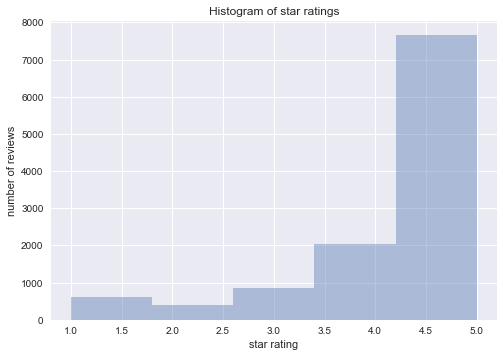

In [23]:
# frequency histogram of star ratings
sns.distplot(rev_texts.overall, bins=5, kde=False);
plt.title('Histogram of star ratings');
plt.xlabel('star rating');
plt.ylabel('number of reviews');

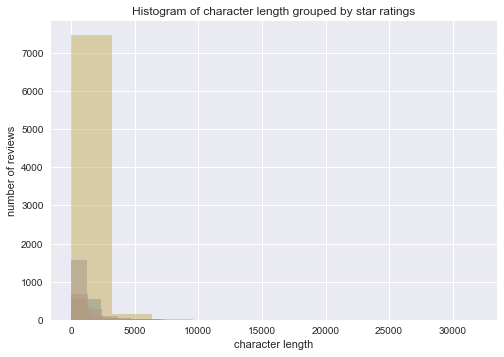

In [24]:
# compare review text features for 1-star vs 5-star reviews 
rev_texts.groupby('overall').char_length.hist(alpha=0.6);
plt.title('Histogram of character length grouped by star ratings');
plt.xlabel('character length');
plt.ylabel('number of reviews');

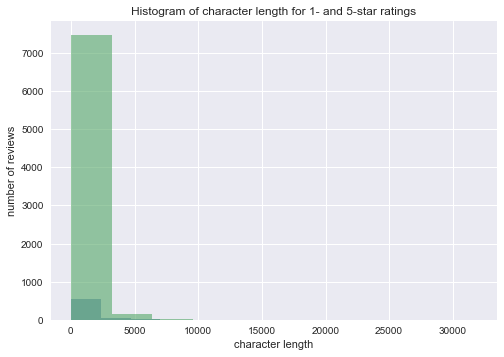

In [25]:
# compare review text features for 1-star vs 5-star reviews
one_five.groupby('overall').char_length.hist(alpha=0.6);
plt.title('Histogram of character length for 1- and 5-star ratings');
plt.xlabel('character length');
plt.ylabel('number of reviews');

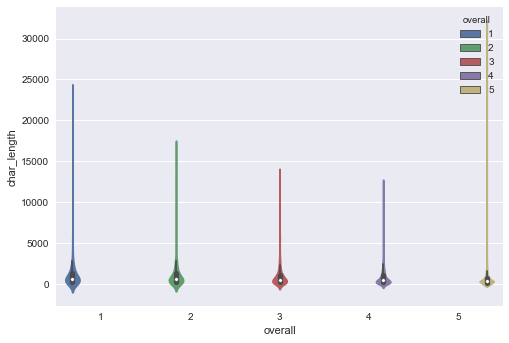

In [27]:
# number of words vs number of stars (violin plot because swarm plot too slow) 
sns.violinplot(x="overall", y="char_length", hue="overall", data=rev_texts, palatte='Set2');

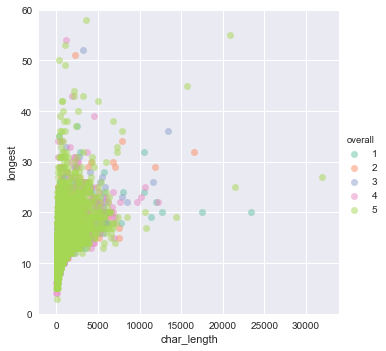

In [28]:
# how closely related are the number of characters per review and the length of the longest word?
# with seaborn plot scatter plot of review character count against longest word length colored by 'overall'
sns.lmplot(x='char_length', y='longest', hue='overall', palette='Set2', data=rev_texts, fit_reg=False, scatter_kws={'alpha':0.5});
plt.ylim(0,60); # limit y-axis to hide the very-long-word ouliers that I will deal with later

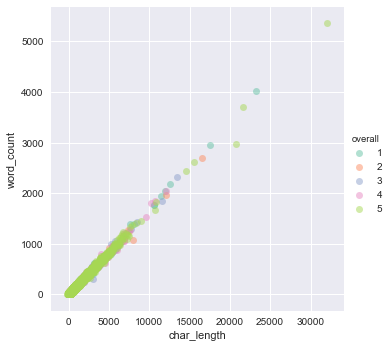

In [29]:
# word count and number of characters will certainly be closely related, but let's look
# with seaborn plot scatter plot of review character count against longest word length colored by 'overall'
sns.lmplot(x='char_length', y='word_count', hue='overall', palette='Set2', data=rev_texts, fit_reg=False, x_jitter=200, scatter_kws={'alpha':0.5});
#plt.ylim(0,60); # limit y-axis to hide the very-long-word ouliers that I will deal with later

In [77]:
# time series: changes in star ratings over time for frequently reviewed book(s) 
data = rev_texts[rev_texts.asin == '0544114515']
data_rate = data[['overall', 'reviewTime']]
data_rate.head(2)

,overall,reviewTime
4421,5,"03 17, 2014"
4422,5,"03 18, 2014"


In [81]:
# time series: changes in star ratings over time for frequently reviewed book(s) 
data2 = rev_texts[rev_texts.asin == '1594865671']
data2_rate = data2[['overall', 'reviewTime']]
data2_rate.head(2)

,overall,reviewTime
10358,4,"01 19, 2012"
10359,5,"08 4, 2006"


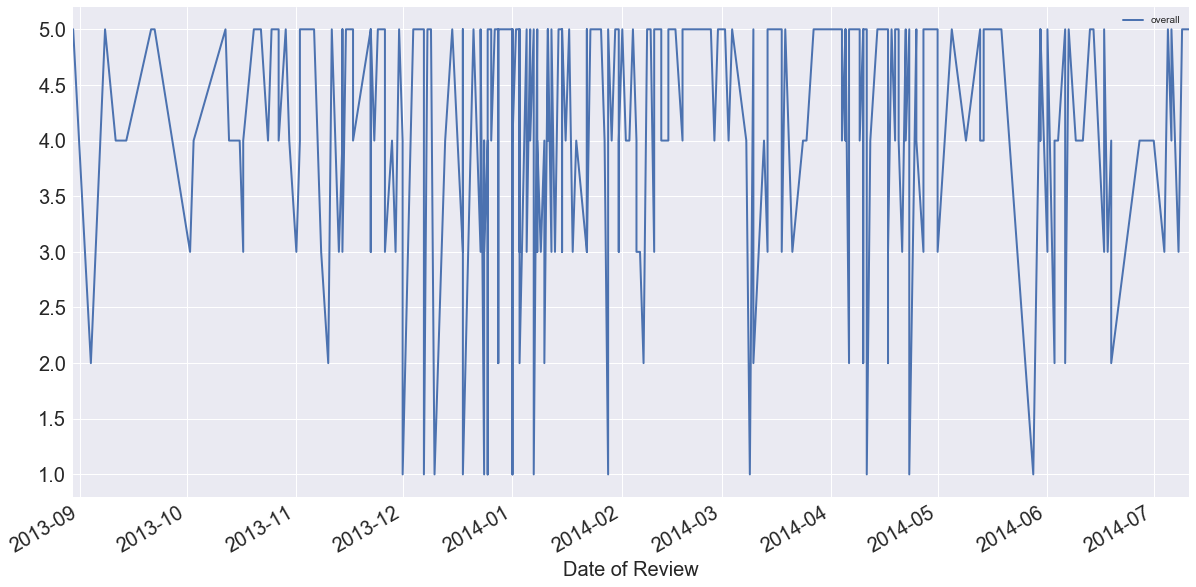

In [78]:
pd.options.mode.chained_assignment = None  # default='warn'
data_rate.reviewTime = pd.to_datetime(data_rate.reviewTime)
data_rate.set_index('reviewTime', inplace=True)
data_rate.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Date of Review', fontsize=20)

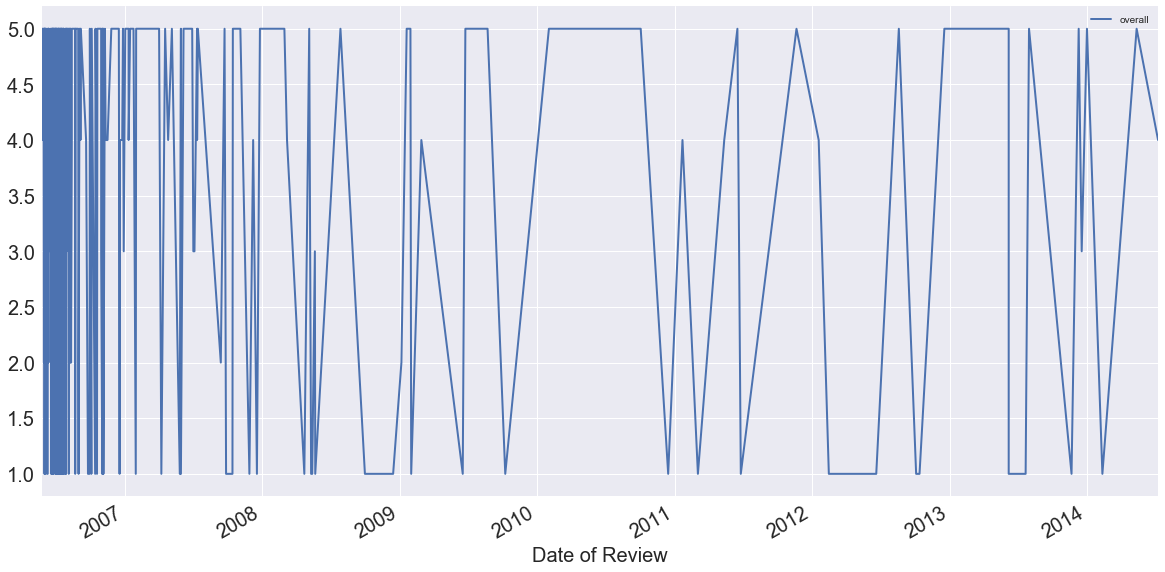

In [82]:
pd.options.mode.chained_assignment = None  # default='warn'
data2_rate.reviewTime = pd.to_datetime(data2_rate.reviewTime)
data2_rate.set_index('reviewTime', inplace=True)
data2_rate.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Date of Review', fontsize=20)

### 4) Conclusions
- __Sythesis, review length__: Characterizing Amazon book reviews of Science Textbooks (and associated non-fiction titles) quantitatively indicates that many more reviewers assign 5-stars to a book than any other rating. Both negatively (1 to 2 stars) and positively (4 to 5-stars) rated books get reviews ranging from a few words to up to 1000 words. A quick-and-dirty estimate of the length of the longest word per review does not reveal any outstanding pattern relating to ratings or word count, but the metric does need refining as the outliers are probably just words strung together without spaces. My data includes many books that only have one or few reviews and one book reviewed by 382 reviewers.
- __Sythesis, ratings over time__: Anecdotally, books reviewed by over 300 reviewers appear to have high and low ratings distributed fairly evenly over time. Review frequency may start out slowly (see first time series plot above) and increase in frequency over time. Some books appear to accumulate many initial reviews and then are reviewed less frequently over time (see second time series plot above).
- __Conclusions__: This sub-sampled set of reviews in a specific genre match general trends from the large source-database. The original database of 22,507,155 book reviews is 62% 5-star reviews. The Science Textbook reviews consist of 66% 5-star reviews. Patterns for reviews are not consistent. Over time some books aquire many reviews at first, but are reviewed less frequently later. 
- __Future directions__: As I explore the data further, I expect that gaining insights from the content, not just quantitative metrics, will give me more insight into the nature of low and highly-rated books. I will use more refined methods to count words, assess word lengths, and build additional features to contribute to the characterization of reviews. Another interesting feature of the Amazon review format is that reviewers include a short 'summary' of their review, separate from the text of the review. Can this short summary predict ratings as well as long reviews? Can the sentiment of the summary encapsulate the feelings of the reviewer towards the book? Further, there may be patterns of rating levels over time (peer or popularity effect). Such patters could be further explored.
***

In [26]:
# pickle dataframe with new columns
rev_texts.to_pickle('reviews_counts.pickle')